In [ ]:
import pandas as pd
import sys

In [ ]:
from google.colab import userdata
token = userdata.get('HF_TOKEN')

In [ ]:
from huggingface_hub import login

login(token)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sys.path.append('/content/drive/MyDrive')

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/text dataset/dataset_preprocessed.csv")

In [ ]:

from sklearn.model_selection import StratifiedShuffleSplit

x = dataset.drop("dialect_l_encoded", axis=1)
y = dataset["dialect_l_encoded"]

# Define StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, temp_idx in split.split(x, y):
    x_train, x_temp = x.iloc[train_idx], x.iloc[temp_idx]
    y_train, y_temp = y.iloc[train_idx], y.iloc[temp_idx]

# Splitting temp into validation and test
split2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for val_idx, test_idx in split2.split(x_temp, y_temp):
    x_val, x_test = x_temp.iloc[val_idx], x_temp.iloc[test_idx]
    y_val, y_test = y_temp.iloc[val_idx], y_temp.iloc[test_idx]

x_train_text = x_train["text"].reset_index(drop=True)
x_val_text = x_val["text"].reset_index(drop=True)
x_test = x_test["text"].reset_index(drop=True)

print(f"Number of data to train: {len(x_train)}")
print(f"Number of data to validate: {len(x_val)}")
print(f"Number of labels to train: {len(y_train)}")
print(f"Number of labels to validate: {len(y_val)}")

Number of data to train: 352041
Number of data to validate: 44005
Number of labels to train: 352041
Number of labels to validate: 44005


Cleaned dataset

In [ ]:
pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install arabert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 9.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186456 sha256=2ac9cecf141fb8476a6a5ca885865902bfbeb3c1bf351eaf66d9c27ab940a2f7
  Stored in directory: /root/.cache/pip/wheels/94/08/b4/78657b1541bb704b088317b52429ee4016d9888fe47dbb130f
Successfully built emoji


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
import torch
from datasets import Dataset

In [ ]:
import numpy as np

In [ ]:
from tqdm import tqdm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from arabert.preprocess import ArabertPreprocessor
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification

In [ ]:
arabert_model = AutoModelForSequenceClassification.from_pretrained("aubmindlab/bert-base-arabertv02-twitter", num_labels=18)

config.json:   0%|          | 0.00/667 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02-twitter and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
arabert_model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(64000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

AraBERT preprocessing

*   Removing diacritics
*   Normalizing Arabic letters
*   Handling elongations
*   Removing Tatweel





In [ ]:
arabert_prep = ArabertPreprocessor("aubmindlab/bert-base-arabertv02-twitter")

In [ ]:
test = "😊أَنَا ٱسْمِي عُمَرُ، أَنَا طَالِبٌ فِي جَامِعَةٍ مِصْرِيَّةٍ"
arabert_prep.preprocess(test)

'😊 أنا ٱ سمي عمر ، أنا طالب في جامعة مصرية'

Arabert tokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv02-twitter")

sentences = ["النماذج اللغوية التوليدية مفيدة جدًا!"]

token_ids = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")
tokenized_output = tokenizer.convert_ids_to_tokens(token_ids["input_ids"][0])

print(tokenized_output)

tokenizer_config.json:   0%|          | 0.00/476 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/751k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.25M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

['[CLS]', 'النماذج', 'اللغوية', 'التوليد', '##ية', 'مفيدة', '[UNK]', '!', '[SEP]']


In [ ]:
def tokenization_and_preprocessing(text):
  processed_text = [arabert_prep.preprocess(sentence) for sentence in tqdm(text, desc="preprocessing sentences")]
  token_ids = tokenizer(processed_text, add_special_tokens=True, padding="max_length", truncation=True, max_length=64, return_tensors="np")

  print(token_ids["input_ids"][:2])
  return token_ids

In [ ]:
x_train_tokenized = tokenization_and_preprocessing(x_train_text)
x_val_tokenized = tokenization_and_preprocessing(x_val_text)
x_test_tokenized = tokenization_and_preprocessing(x_test)

preprocessing sentences: 100%|██████████| 352041/352041 [00:40<00:00, 8712.27it/s]


[[    2  3725   208   546   193   434   418 46510 17401   195  1805  1726
  26752   307 11669  4476 17401  1805  1998  4775 26291 51375  1901 32415
      3     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    2  3725   208   546   193  3725   208   546   193 17688 22890 12359
   4158   305 49734   336   185 25074  1792  3315  3340  5950 25239   193
    103 18017  7552 30936  9400 24701  1017  8029   201 41344  3803  5510
  47816 61483   764   994   696 18017  7552    24  1424  5248  3451   228
    354 17460   674 46420 10524   201   485  1732   193  1177 52619 34225
   1841 62745 50808     3]]


preprocessing sentences: 100%|██████████| 44005/44005 [00:05<00:00, 8085.11it/s]


[[    2  3725   208   546   193   394  1356 12792   335   649  1269  8904
    138   195     3     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    2  3725   208   546   193  3725   208   546   193  2622   209 34463
    697  7625  4579 25676  3050  5972 10042  4526  5233   209  6762 31167
  20883  9513 15981 12978 42417   193  1110  1729 17090 44213  2604 55047
   1893  1729   754   338   917  7245  6697   306 17876  2077   231   305
    786 44213  2903   195   391  7379  2077   231 45763     3     0     0
      0     0     0     0]]


preprocessing sentences: 100%|██████████| 44006/44006 [00:05<00:00, 8776.46it/s]


[[    2 55129   533   459  4803   195 17454  1530   209   394 46386 13174
  53198   183  2630   209 62279     3     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [    2  3725   208   546   193  3725   208   546   193 60216   847   684
   5714  4358 19271 19013  1004  5586   435 10164   195 38881  5628  4925
  32475  1277  6930  1054  7213   336 54111 22903  2561   307 60183  3551
  15606  9792  5510 50278  3504     3     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]]


In [ ]:
# Convert tokenized data into a Dataset object
train_dataset = Dataset.from_dict({**x_train_tokenized, "labels": y_train.to_numpy()})
val_dataset = Dataset.from_dict({**x_val_tokenized, "labels": y_val.to_numpy()})
test_dataset = Dataset.from_dict({**x_test_tokenized, "labels": y_test.to_numpy()})

In [ ]:
print(train_dataset[0])  # Should show input_ids, attention_mask, and labels
print(val_dataset[0])
print(test_dataset[0])

{'input_ids': [2, 3725, 208, 546, 193, 434, 418, 46510, 17401, 195, 1805, 1726, 26752, 307, 11669, 4476, 17401, 1805, 1998, 4775, 26291, 51375, 1901, 32415, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'labels': 12}
{'input_ids': [2, 3725, 208, 546, 193, 394, 1356, 12792, 335, 649, 1269, 8904, 138, 195, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    preds = np.argmax(predictions, axis=1)     # Convert logits to class predictions
    accuracy = accuracy_score(labels, preds)
    f1 = f1_score(labels, preds, average="weighted")

    return {"accuracy": accuracy, "f1_score": f1}

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="/arabert_finetuned/",
    learning_rate=2e-5,
    per_device_train_batch_size=128,
    per_device_eval_batch_size=128,
    num_train_epochs=15,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    weight_decay=0.01,
    load_best_model_at_end=True,
    logging_strategy="steps",
    logging_steps=500,  # Log loss every 500 steps
    report_to="none"  # Prevents `wandb` or other loggers
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=arabert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1 Score
1,1.407400,1.335742,0.578707,0.571890
2,1.210900,1.253217,0.603795,0.597941
3,1.080200,1.209148,0.619657,0.617177
4,0.945700,1.207379,0.625270,0.622138
5,0.854200,1.244118,0.625406,0.624405
6,0.762000,1.289067,0.626838,0.626153
7,0.675600,1.304677,0.626861,0.627145
8,0.608100,1.361902,0.626611,0.626595
9,0.532500,1.408777,0.627679,0.627547
10,0.476300,1.468144,0.625474,0.625965


TrainOutput(global_step=41265, training_loss=0.7006886733570605, metrics={'train_runtime': 24899.492, 'train_samples_per_second': 212.077, 'train_steps_per_second': 1.657, 'total_flos': 1.7369847271177344e+17, 'train_loss': 0.7006886733570605, 'epoch': 15.0})

In [ ]:
trainer.save_model("finetunned_arabert_model")

In [ ]:
trainer.save_model("/content/drive/MyDrive/arabert finetune")

In [ ]:
trainer.evaluate()

{'eval_loss': 1.2073793411254883,
 'eval_accuracy': 0.6252698556982161,
 'eval_f1_score': 0.6221381144165915,
 'eval_runtime': 72.6184,
 'eval_samples_per_second': 605.976,
 'eval_steps_per_second': 4.737,
 'epoch': 15.0}

In [ ]:
tokenizer.save_pretrained("arabert_tokenizer")

('arabert_tokenizer/tokenizer_config.json',
 'arabert_tokenizer/special_tokens_map.json',
 'arabert_tokenizer/vocab.txt',
 'arabert_tokenizer/added_tokens.json',
 'arabert_tokenizer/tokenizer.json')

In [ ]:
preds_output = trainer.predict(test_dataset)

logits are unormalized scores for each dialect that hasn't been passed to softmax to output a probability

In [ ]:
logits = np.argmax(preds_output.predictions, axis=1)

**Wrong Labels** **❌**

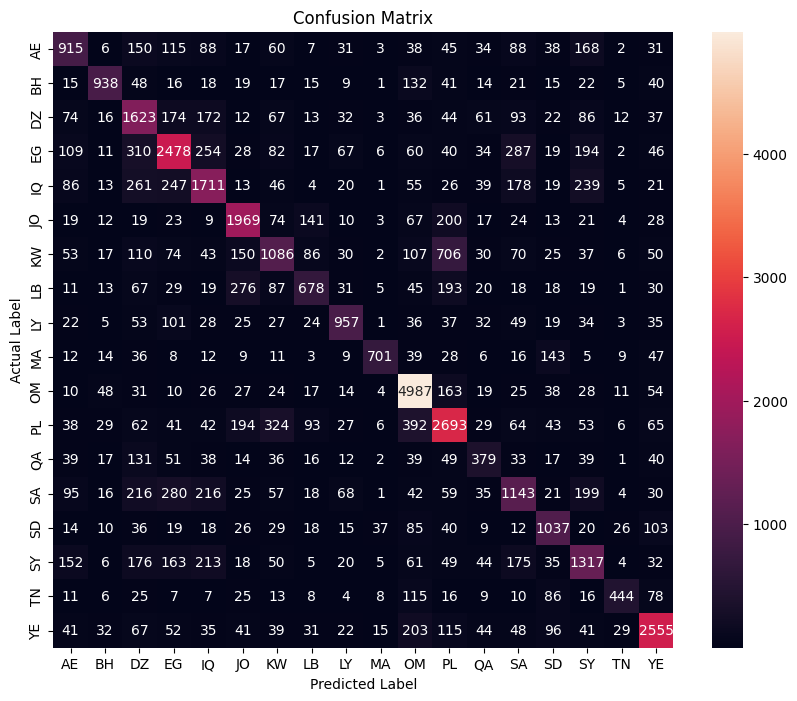

In [ ]:
test_labels = np.array(test_dataset["labels"])

conf_matrix  = confusion_matrix(test_labels, logits)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
class_names = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']
sns.heatmap(conf_matrix , annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(test_labels, logits, target_names=class_names, digits=4)
print("Classification Report:\n\n\n", report)

Classification Report:


               precision    recall  f1-score   support

          AE     0.5332    0.4984    0.5152      1836
          BH     0.7758    0.6768    0.7229      1386
          DZ     0.4744    0.6298    0.5412      2577
          EG     0.6373    0.6128    0.6248      4044
          IQ     0.5802    0.5734    0.5768      2984
          JO     0.6818    0.7422    0.7107      2653
          KW     0.5101    0.4049    0.4515      2682
          LB     0.5678    0.4346    0.4924      1560
          LY     0.6945    0.6431    0.6678      1488
          MA     0.8719    0.6327    0.7333      1108
          OM     0.7627    0.9008    0.8260      5536
          PL     0.5926    0.6410    0.6159      4201
          QA     0.4433    0.3977    0.4192       953
          SA     0.4856    0.4527    0.4685      2525
          SD     0.6086    0.6673    0.6366      1554
          SY     0.5189    0.5216    0.5202      2525
          TN     0.7735    0.5000    0.6074       888
 

**Correct Labels** **✅**

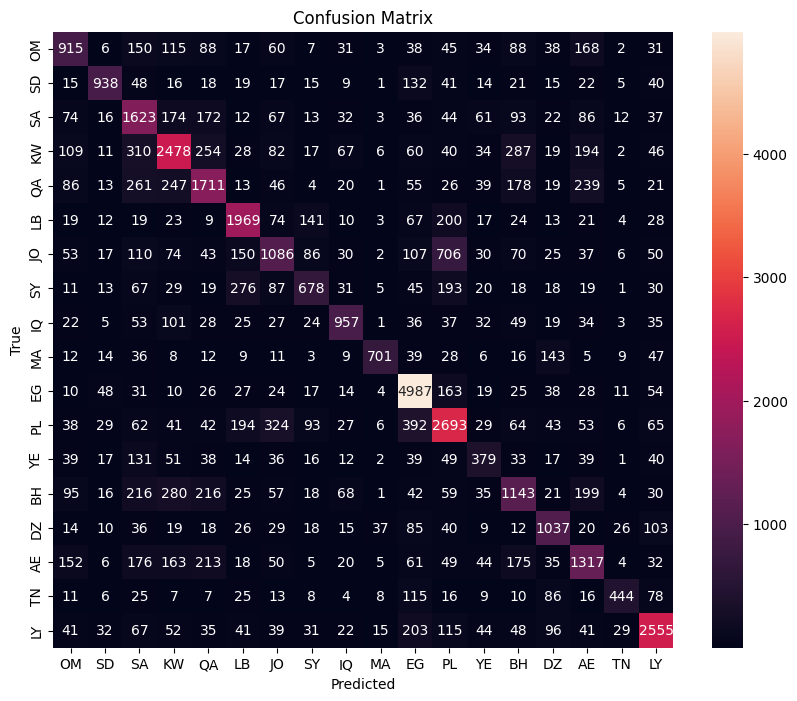

In [ ]:
import numpy as np

# Confusion matrix (18x18) with your specified label order
confusion_matrix = np.array([
    [915, 6, 150, 115, 88, 17, 60, 7, 31, 3, 38, 45, 34, 88, 38, 168, 2, 31],      # OM
    [15, 938, 48, 16, 18, 19, 17, 15, 9, 1, 132, 41, 14, 21, 15, 22, 5, 40],        # SD
    [74, 16, 1623, 174, 172, 12, 67, 13, 32, 3, 36, 44, 61, 93, 22, 86, 12, 37],    # SA
    [109, 11, 310, 2478, 254, 28, 82, 17, 67, 6, 60, 40, 34, 287, 19, 194, 2, 46],  # KW
    [86, 13, 261, 247, 1711, 13, 46, 4, 20, 1, 55, 26, 39, 178, 19, 239, 5, 21],    # QA
    [19, 12, 19, 23, 9, 1969, 74, 141, 10, 3, 67, 200, 17, 24, 13, 21, 4, 28],      # LB
    [53, 17, 110, 74, 43, 150, 1086, 86, 30, 2, 107, 706, 30, 70, 25, 37, 6, 50],   # JO
    [11, 13, 67, 29, 19, 276, 87, 678, 31, 5, 45, 193, 20, 18, 18, 19, 1, 30],      # SY
    [22, 5, 53, 101, 28, 25, 27, 24, 957, 1, 36, 37, 32, 49, 19, 34, 3, 35],        # IQ
    [12, 14, 36, 8, 12, 9, 11, 3, 9, 701, 39, 28, 6, 16, 143, 5, 9, 47],            # MA
    [10, 48, 31, 10, 26, 27, 24, 17, 14, 4, 4987, 163, 19, 25, 38, 28, 11, 54],     # EG
    [38, 29, 62, 41, 42, 194, 324, 93, 27, 6, 392, 2693, 29, 64, 43, 53, 6, 65],    # PL
    [39, 17, 131, 51, 38, 14, 36, 16, 12, 2, 39, 49, 379, 33, 17, 39, 1, 40],       # YE
    [95, 16, 216, 280, 216, 25, 57, 18, 68, 1, 42, 59, 35, 1143, 21, 199, 4, 30],    # BH
    [14, 10, 36, 19, 18, 26, 29, 18, 15, 37, 85, 40, 9, 12, 1037, 20, 26, 103],     # DZ
    [152, 6, 176, 163, 213, 18, 50, 5, 20, 5, 61, 49, 44, 175, 35, 1317, 4, 32],    # AE
    [11, 6, 25, 7, 7, 25, 13, 8, 4, 8, 115, 16, 9, 10, 86, 16, 444, 78],            # TN
    [41, 32, 67, 52, 35, 41, 39, 31, 22, 15, 203, 115, 44, 48, 96, 41, 29, 2555]    # LY
])

# Label list for reference
labels = ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY']

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

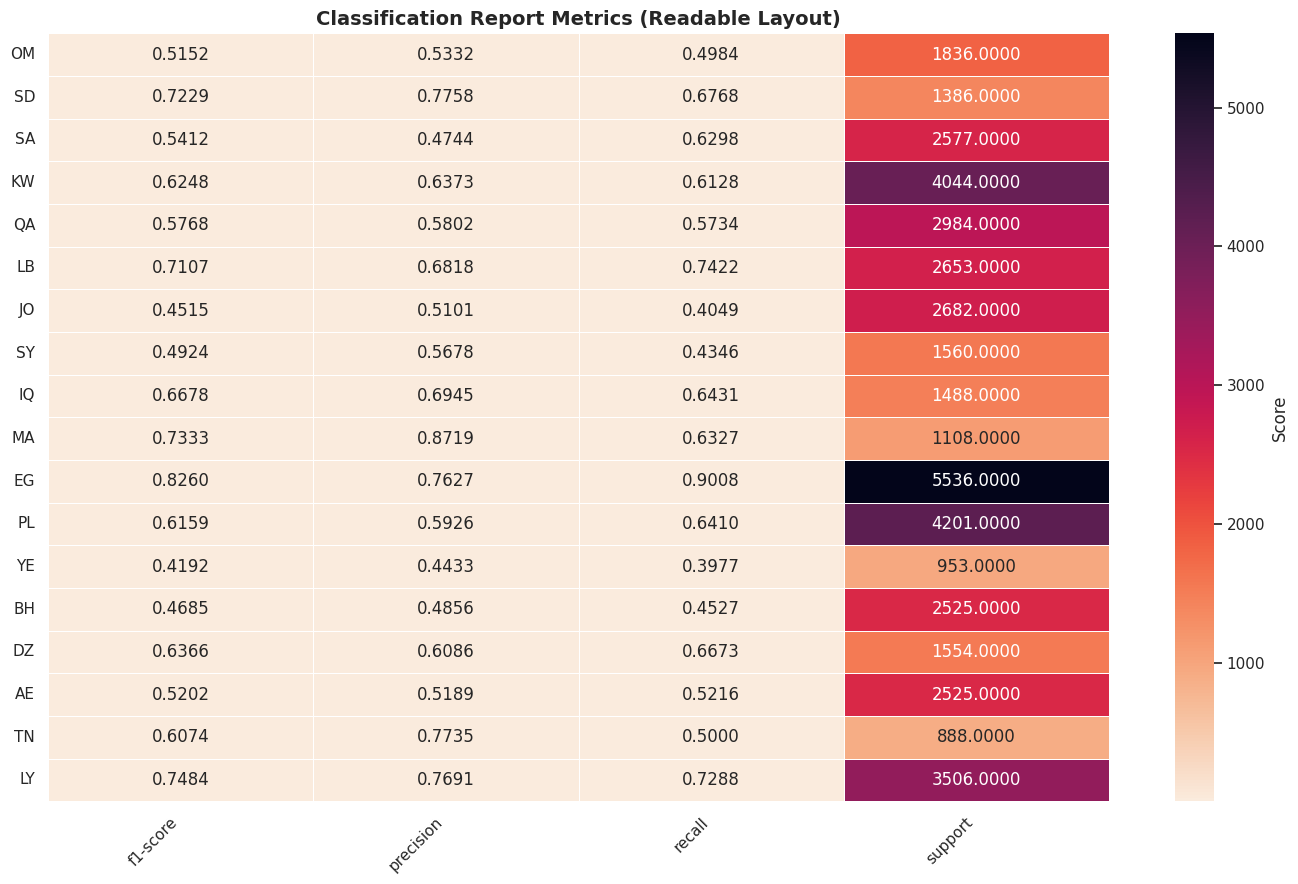

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
data = {
    'dialect': ['OM', 'SD', 'SA', 'KW', 'QA', 'LB', 'JO', 'SY', 'IQ', 'MA', 'EG', 'PL', 'YE', 'BH', 'DZ', 'AE', 'TN', 'LY'],
    'precision': [0.5332, 0.7758, 0.4744, 0.6373, 0.5802, 0.6818, 0.5101, 0.5678, 0.6945, 0.8719, 0.7627, 0.5926, 0.4433, 0.4856, 0.6086, 0.5189, 0.7735, 0.7691],
    'recall': [0.4984, 0.6768, 0.6298, 0.6128, 0.5734, 0.7422, 0.4049, 0.4346, 0.6431, 0.6327, 0.9008, 0.6410, 0.3977, 0.4527, 0.6673, 0.5216, 0.5000, 0.7288],
    'f1-score': [0.5152, 0.7229, 0.5412, 0.6248, 0.5768, 0.7107, 0.4515, 0.4924, 0.6678, 0.7333, 0.8260, 0.6159, 0.4192, 0.4685, 0.6366, 0.5202, 0.6074, 0.7484],
    'support': [1836, 1386, 2577, 4044, 2984, 2653, 2682, 1560, 1488, 1108, 5536, 4201, 953, 2525, 1554, 2525, 888, 3506]
}
df = pd.DataFrame(data)

# Preserve original order
dialect_order = data['dialect']
df['dialect'] = pd.Categorical(df['dialect'], categories=dialect_order, ordered=True)

# Melt and pivot
melted_df = df.melt(id_vars='dialect', var_name='metric', value_name='value')
pivot_df = melted_df.pivot(index='dialect', columns='metric', values='value')

# Plot
plt.figure(figsize=(14, 9))
sns.set_theme(style="whitegrid")

ax = sns.heatmap(
    pivot_df,
    annot=True, fmt=".4f", linewidths=.5,
    cbar_kws={'label': 'Score'},
    cmap='rocket_r'
)

# Improve readability
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.title('Classification Report Metrics (Readable Layout)', fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

<ipython-input-46-3bfef6fc6c76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index, y=report_df["f1-score"], palette="coolwarm")


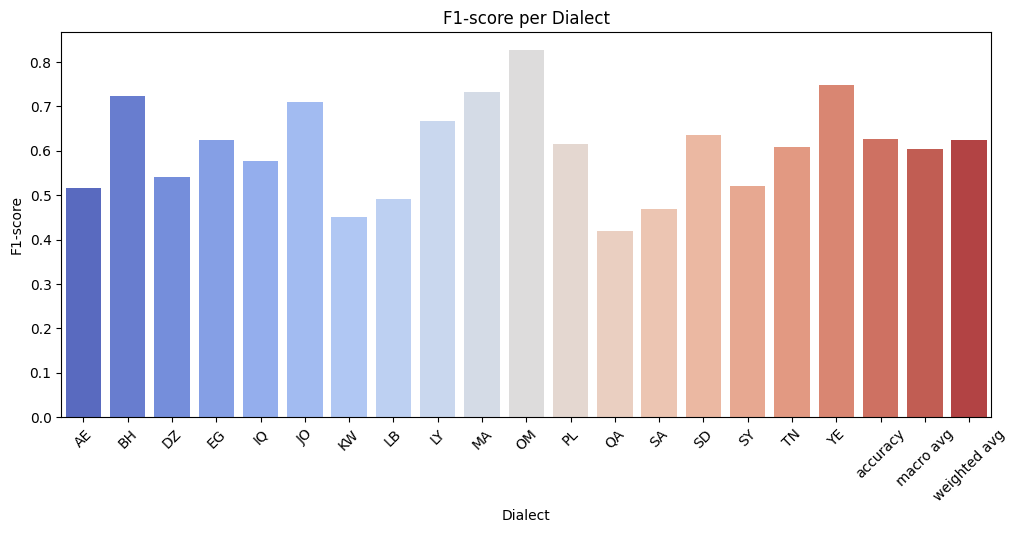

In [ ]:
report_dict = classification_report(test_labels, logits, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report_dict).T
plt.figure(figsize=(12, 5))
sns.barplot(x=report_df.index, y=report_df["f1-score"], palette="coolwarm")
plt.xticks(rotation=45)
plt.ylabel("F1-score")
plt.xlabel("Dialect")
plt.title("F1-score per Dialect")
plt.show()

In [ ]:
accuracy = accuracy_score(test_labels, logits)
f1 = f1_score(test_labels, logits, average="weighted")  # 'weighted' handles class imbalance

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6274
F1 Score: 0.6242


Confidence score calculation if needed

In [ ]:
from scipy.special import softmax

probabilities = softmax(predictions, axis=1)
print(probabilities)